# Lesson 1: Data Analysis Process

## Load Data from CSV

In [1]:
import unicodecsv

def read_csv(csv_file_name: str, print_basic_info: bool = False) -> list:
    with open(csv_file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        res_list = list(reader)
    if print_basic_info:
        print("CSV file read: ", csv_file_name)
        print("Row count: ", len(res_list))
        print("First row: ", res_list[0])
    return res_list

### Load `enrollments.csv`

In [2]:
enrollments_filename = '../resources/enrollments.csv'
enrollments = read_csv(enrollments_filename, print_basic_info=True)

CSV file read:  ../resources/enrollments.csv
Row count:  1640
First row:  {'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}


### Load `daily_engagement.csv`

In [3]:
engagement_filename = '../resources/daily_engagement.csv'
daily_engagement = read_csv(engagement_filename, print_basic_info=True)

CSV file read:  ../resources/daily_engagement.csv
Row count:  136240
First row:  {'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}


### Load `project_submissions.csv`

In [4]:
submissions_filename = '../resources/project_submissions.csv'
project_submissions = read_csv(submissions_filename, print_basic_info=True)

CSV file read:  ../resources/project_submissions.csv
Row count:  3640
First row:  {'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


## Fixing Data Types

### Intro code

Some intro code was provided by Udacity in the `L1_Starter_Code.ipynb` Jupyter notebook.
I've partially refactored it.

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object.
# If there is no date given, returns None
def parse_date(date): 
    return None if date == '' else dt.strptime(date, '%Y-%m-%d')

# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    return None if i == '' else int(i)

Other than in `L1_Starter_Code.ipynb`, we will use pre-defined column names.

In [6]:
# enrollments
class ColEnr:
    cancel_date = 'cancel_date'
    days_to_cancel = 'days_to_cancel'
    is_canceled = 'is_canceled'
    is_udacity = 'is_udacity'
    join_date = 'join_date'
    account_key = 'account_key'
    status = 'status'

# daily engagements
class ColDailyEng:
    lessons_completed = 'lessons_completed'
    num_courses_visited = 'num_courses_visited'
    projects_completed = 'projects_completed'
    total_minutes_visited = 'total_minutes_visited'
    utc_date = 'utc_date'
    acct = 'acct' # column name for account key in the csv
    account_key = 'account_key' # new column name for account key

# project submissions
class ColProjSub:
    completion_date = 'completion_date'
    creation_date = 'creation_date'
    assigned_rating = 'assigned_rating'
    account_key = 'account_key'
    lesson_key = 'lesson_key'
    processing_state = 'processing_state'

In [7]:
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment[ColEnr.cancel_date] = parse_date(enrollment[ColEnr.cancel_date])
    enrollment[ColEnr.days_to_cancel] = parse_maybe_int(enrollment[ColEnr.days_to_cancel])
    enrollment[ColEnr.is_canceled] = enrollment[ColEnr.is_canceled] == 'True'
    enrollment[ColEnr.is_udacity] = enrollment[ColEnr.is_udacity] == 'True'
    enrollment[ColEnr.join_date] = parse_date(enrollment[ColEnr.join_date])

enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [8]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record[ColDailyEng.lessons_completed] = int(float(engagement_record[ColDailyEng.lessons_completed]))
    engagement_record[ColDailyEng.num_courses_visited] = int(float(engagement_record[ColDailyEng.num_courses_visited]))
    engagement_record[ColDailyEng.projects_completed] = int(float(engagement_record[ColDailyEng.projects_completed]))
    engagement_record[ColDailyEng.total_minutes_visited] = float(engagement_record[ColDailyEng.total_minutes_visited])
    engagement_record[ColDailyEng.utc_date] = parse_date(engagement_record[ColDailyEng.utc_date])

daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [9]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission[ColProjSub.completion_date] = parse_date(submission[ColProjSub.completion_date])
    submission[ColProjSub.creation_date] = parse_date(submission[ColProjSub.creation_date])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

For each of the three tables:
- find the number of rows
- find the number of unique students (account keys)

In [10]:
enrollment_num_rows = len(enrollments)
engagement_num_rows = len(daily_engagement)
submission_num_rows = len(project_submissions)

enrollments_account_key_set = {e[ColEnr.account_key] for e in enrollments}
engagement_account_key_set = {e[ColDailyEng.acct] for e in daily_engagement}
submission_account_key_set = {e[ColProjSub.account_key] for e in project_submissions}

enrollment_num_unique_students = len(enrollments_account_key_set)
engagement_num_unique_students = len(engagement_account_key_set)
submission_num_unique_students = len(submission_account_key_set)

print('enrollment_num_rows=', enrollment_num_rows)
print('engagement_num_rows=', engagement_num_rows)
print('submission_num_rows=', submission_num_rows)
print('enrollment_num_unique_students=', enrollment_num_unique_students)
print('engagement_num_unique_students=', engagement_num_unique_students)
print('submission_num_unique_students=', submission_num_unique_students)

enrollment_num_rows= 1640
engagement_num_rows= 136240
submission_num_rows= 3640
enrollment_num_unique_students= 1302
engagement_num_unique_students= 1237
submission_num_unique_students= 743


## Problems in the Data

Rename the `acct` column in the `daily_engagement` table to `account_key`.

In [11]:
for e in daily_engagement:
    e[ColDailyEng.account_key] = e[ColDailyEng.acct]
    del e[ColDailyEng.acct]

print(daily_engagement[0][ColDailyEng.account_key])

0


## Missing Engagement Records

Find student enrollments where there is no corresponding student in the daily engagement table.

First, we find the account keys present in enrollments but missing in engagements.

In [12]:
missing_engagement_account_key_set = enrollments_account_key_set - engagement_account_key_set
print("There are {} account keys in enrollments table that are missing in the engagement table."
      .format(len(missing_engagement_account_key_set)))
print(sorted(missing_engagement_account_key_set, key=lambda e: int(e)))

There are 65 account keys in enrollments table that are missing in the engagement table.
['654', '664', '707', '711', '717', '725', '727', '728', '733', '737', '739', '749', '750', '766', '789', '799', '802', '803', '817', '819', '841', '870', '871', '875', '878', '884', '889', '902', '914', '926', '964', '968', '981', '996', '997', '1010', '1025', '1044', '1063', '1069', '1079', '1086', '1101', '1120', '1125', '1129', '1145', '1148', '1155', '1171', '1186', '1190', '1191', '1213', '1218', '1219', '1222', '1237', '1238', '1241', '1270', '1273', '1284', '1291', '1304']


Now we find the corresponding enrollment records

In [13]:
enrollments_without_engagement = [e for e in enrollments if e[ColDailyEng.account_key] in missing_engagement_account_key_set]


Print some of the records

In [14]:
for e in enrollments_without_engagement[:5]:
    print(e)

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}
{'account_key': '871', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 13, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}
{'account_key': '1218', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 15, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}
{'account_key': '654', 'status': 'canceled', 'join_date': datetime.datetime(2014, 12, 4, 0, 0), 'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}
{'account_key': '654', 'status': 'canceled', 'join_date': datetime.datetime(2014, 12, 4, 0, 0), 'cancel_date': datetime.datetime(2014, 12, 4, 0,

## Checking for More Problem Records

Now, find the number of surprising records from enrollment table
that are missing in the engagment table
but still have _not_ been canceled on the same day.

In [15]:
enrollments_without_engagement_not_canceled_on_same_day = [
    e for e in enrollments_without_engagement
    if e[ColEnr.cancel_date] is None or e[ColEnr.cancel_date] > e[ColEnr.join_date] ]

print("There are {} enrollment records without corresponging engagement records, "
      "which do have not been canceled on same day:".format(len(enrollments_without_engagement_not_canceled_on_same_day)))
for e in enrollments_without_engagement_not_canceled_on_same_day:
    print(e)

There are 3 enrollment records without corresponging engagement records, which do have not been canceled on same day:
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}


These surprising records are udacity test accounts: this information has been given in the lesson video.
Now we want to find all test accounts and exclude them from the data.

In [16]:
udacity_test_account_keys = {e[ColEnr.account_key] for e in enrollments if e[ColEnr.is_udacity]}
print("There are {} test accounts in the enrollments table:".format(len(udacity_test_account_keys)))
print(udacity_test_account_keys)

There are 6 test accounts in the enrollments table:
{'312', '1101', '1304', '1069', '818', '448'}


We remove the udacity test accounts from the data

In [17]:
filter_non_test_accounts = lambda records, account_key_col: [e for e in records if e[account_key_col] not in udacity_test_account_keys]
non_test_enrollments = filter_non_test_accounts(enrollments, ColEnr.account_key)
non_test_daily_engagement = filter_non_test_accounts(daily_engagement, ColDailyEng.account_key)
non_test_project_submissions = filter_non_test_accounts(project_submissions, ColProjSub.account_key)

print("Number of non-test accounts in")
print("- enrollments table:", len(non_test_enrollments))
print("- daily engagement table:", len(non_test_daily_engagement))
print("- project submissions table:", len(non_test_project_submissions))


Number of non-test accounts in
- enrollments table: 1622
- daily engagement table: 135656
- project submissions table: 3632


## Refining the Question

Find students that haven't canceled yet or remained enrolled for more than 7 days.

In [18]:
paid_students = { e[ColEnr.account_key]:e[ColEnr.join_date] for e in non_test_enrollments
                  if not e[ColEnr.is_canceled] or e[ColEnr.days_to_cancel] > 7 }
len(paid_students)

995

Now we also include an additional requirement to store the latest enrollment date for each student.

In [19]:
old_paid_students = paid_students
paid_students = dict()
for e in non_test_enrollments:
    if not e[ColEnr.is_canceled] or e[ColEnr.days_to_cancel] > 7:
        acc_key = e[ColEnr.account_key]
        join_date = e[ColEnr.join_date]
        curr_value = paid_students.get(acc_key, None)
        if curr_value is None or join_date > curr_value:
            paid_students[acc_key] = join_date

len(paid_students)

995

In [20]:
result_has_changed = set(old_paid_students.values()) != set(paid_students.values())
print("The resulting dictionary is", "different." if result_has_changed else "the same.")

The resulting dictionary is different.


## Getting Data from the First Week

<a id='calculation-of-paid_daily_engagement_first_week'></a>

We filter the engagement records in the first week.
The calculation has been fixed as explained [here](#fixing-calculation-of-paid_daily_engagement_first_week).

In [21]:
paid_daily_engagement_first_week = []
for e in non_test_daily_engagement:
    acc_key = e[ColDailyEng.account_key]
    eng_date = e[ColDailyEng.utc_date]
    join_date = paid_students.get(acc_key, None)
    # if join_date is not None and (eng_date - join_date).days < 7: # fixed after debugging
    if join_date is not None and join_date <= eng_date and (eng_date - join_date).days < 7:
        paid_daily_engagement_first_week.append(e)

len(paid_daily_engagement_first_week)

6919

## Exploring Student Engagement

### Intro code

Some intro code was provided by Udacity in the `L1_Starter_Code.ipynb` Jupyter notebook.
I've partially refactored it and added some util functions.

In [22]:
from collections import defaultdict

def group_by(values, key_fun):
    """
    :param values: groups the values by given key extractor function
    :param key_fun: key extractor fuction
    :return: a new dictionary containing for each key a list of values mapped to it
    """
    res = defaultdict(list)
    for e in values:
        key = key_fun(e)
        res[key].append(e)
    return res

def sum_values_by(dict, value_fun=None):
    """
    :param dict: maps keys to a collection of values
    :param value_fun: if specified then will be applied to extract the value to be summed
    :return: a new dict with each key mapped to the sum of corresponding collection values
    """
    return {key : sum(values if value_fun is None else map(value_fun, values))
            for (key, values) in dict.items()}

Compute a dict mapping each account key to a list of its engagement records.

In [23]:
engagement_by_account = group_by(paid_daily_engagement_first_week, lambda e: e[ColDailyEng.account_key])

Define functions to calculate sums by account.

In [24]:
import numpy as np

def sum_engagement_by_account(col_name: str) -> dict:
    return {acc_key : sum([e[col_name] for e in eng_rec_list])
            for (acc_key, eng_rec_list) in engagement_by_account.items()}

def print_values_stats(data, heading:str = None):
    if heading is not None: print(heading)
    values = list(data.values()) if isinstance(data, dict) else data
    print("Number of values:", len(values))
    print("Mean:", np.mean(values))
    print("Standard deviation:", np.std(values))
    print("Min:", np.min(values))
    print("Max:", np.max(values))

Calculate total minutes of engagement by account and print some statistics.

In [25]:
total_minutes_by_account = sum_engagement_by_account(ColDailyEng.total_minutes_visited)
print_values_stats(total_minutes_by_account)

Number of values: 995
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Min: 0.0
Max: 3564.7332644989997


## Debugging Data Analysis Code

Find student with max total_minutes

In [26]:

acc_key_with_max_minutes = max(total_minutes_by_account.keys(), key=lambda acc_key: total_minutes_by_account[acc_key])
print("Account key having max total minutes:", acc_key_with_max_minutes)

engagement_by_account[acc_key_with_max_minutes]

Account key having max total minutes: 163


[{'utc_date': datetime.datetime(2015, 7, 9, 0, 0),
  'num_courses_visited': 4,
  'total_minutes_visited': 850.519339666,
  'lessons_completed': 4,
  'projects_completed': 0,
  'account_key': '163'},
 {'utc_date': datetime.datetime(2015, 7, 10, 0, 0),
  'num_courses_visited': 6,
  'total_minutes_visited': 872.633923334,
  'lessons_completed': 6,
  'projects_completed': 0,
  'account_key': '163'},
 {'utc_date': datetime.datetime(2015, 7, 11, 0, 0),
  'num_courses_visited': 2,
  'total_minutes_visited': 777.018903666,
  'lessons_completed': 6,
  'projects_completed': 0,
  'account_key': '163'},
 {'utc_date': datetime.datetime(2015, 7, 12, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 294.568774,
  'lessons_completed': 2,
  'projects_completed': 0,
  'account_key': '163'},
 {'utc_date': datetime.datetime(2015, 7, 13, 0, 0),
  'num_courses_visited': 3,
  'total_minutes_visited': 471.2139785,
  'lessons_completed': 1,
  'projects_completed': 0,
  'account_key': '163'},
 {'utc

<a id='fixing-calculation-of-paid_daily_engagement_first_week'></a>

The account with maximum sum of engagement minutes has more than 10000 minutes, which is impossible for a week.
Having a look at its engagements  we notice they were not limited to only one week, as they should have been.
As explained in the lesson video this can happen, when a student joined, canceled, and then joined again,
thus possibly having engagements _before_ this rejoining date.
To fix that we go back to the
[calculation of paid_daily_engagement_first_week](#calculation-of-paid_daily_engagement_first_week),
add the condition that the engagement date must be _after_ the join date, and re-run the cells.

After the fix and re-calculation, we get only 7 engagement records in the first week, which is alright.
The total engagement time of 3564 minutes = 59.4 hours in the week is quite a lot, but possible.

## Lessons Completed in First Week

Count completed lessons by account and print some statistics.

In [27]:
lessons_completed_by_account = sum_engagement_by_account(ColDailyEng.lessons_completed)
print_values_stats(lessons_completed_by_account)

Number of values: 995
Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Min: 0
Max: 36


## Number of Visits in First Week

Count the days on which a student visited at least one course.

In [28]:
for engagements in engagement_by_account.values():
    for e in engagements:
        e['has_visited'] = 1 if e[ColDailyEng.num_courses_visited] > 0 else 0

visits_by_account = sum_engagement_by_account('has_visited')
print_values_stats(visits_by_account)

Number of values: 995
Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Min: 0
Max: 7


## Splitting out Passing Students

First, find the project submissions that have on of the given lesson keys.

In [29]:
subway_project_lesson_keys = ['746169184', '3176718735']
subway_project_submissions = list(filter(lambda x: x[ColProjSub.lesson_key] in subway_project_lesson_keys,  project_submissions))
print("{} project submissions for given lesson keys.".format(len(subway_project_submissions)))

1511 project submissions for given lesson keys.


Next, find the account keys that have successfully passed the project at some time.

In [30]:
passed_ratings = ['PASSED', 'DISTINCTION']
account_keys_passed = set()
for e in subway_project_submissions:
    if e[ColProjSub.assigned_rating] in passed_ratings:
        account_keys_passed.add(e[ColProjSub.account_key])

len(account_keys_passed)

653

Now, we count assignment entries for students, which have successfully passed the subway project at some time.

In [31]:
passing_engagement = list(filter(lambda e: e[ColDailyEng.account_key] in account_keys_passed, paid_daily_engagement_first_week))
non_passing_engagement = list(filter(lambda e: e[ColDailyEng.account_key] not in account_keys_passed, paid_daily_engagement_first_week))

print("{} passing engagements".format(len(passing_engagement)))
print("{} non-passing engagements".format(len(non_passing_engagement)))

4527 passing engagements
2392 non-passing engagements


## Comparing the Two Student Groups

First, we group the passing and non-passing engagement records by account key.

In [32]:
passing_engagement_by_account = group_by(passing_engagement, lambda e: e[ColDailyEng.account_key])
non_passing_engagement_by_account = group_by(non_passing_engagement, lambda e: e[ColDailyEng.account_key])

Calculate the total minutes per account.

In [33]:
passing_engagement_by_account_total_minutes_visited = sum_values_by(
    passing_engagement_by_account, lambda x: x[ColDailyEng.total_minutes_visited])
non_passing_engagement_by_account_total_minutes_visited = sum_values_by(
    non_passing_engagement_by_account, lambda x: x[ColDailyEng.total_minutes_visited])

print_values_stats(list(passing_engagement_by_account_total_minutes_visited.values()),
                   heading="Statistics for total minutes in passing engagement records")
print_values_stats(list(non_passing_engagement_by_account_total_minutes_visited.values()),
                   heading="Statistics for total minutes in non-passing engagement records")

Statistics for total minutes in passing engagement records
Number of values: 647
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Min: 0.0
Max: 3564.7332644989997
Statistics for total minutes in non-passing engagement records
Number of values: 348
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Min: 0.0
Max: 1768.5227493319999


Calculate the lessons completed per account.

In [34]:
passing_engagement_by_account_lessons_completed = sum_values_by(
    passing_engagement_by_account, lambda x: x[ColDailyEng.lessons_completed])
non_passing_engagement_by_account_lessons_completed = sum_values_by(
    non_passing_engagement_by_account, lambda x: x[ColDailyEng.lessons_completed])

print_values_stats(list(passing_engagement_by_account_lessons_completed.values()),
                   heading="Statistics for lessons completed in passing engagement records")
print_values_stats(list(non_passing_engagement_by_account_lessons_completed.values()),
                   heading="Statistics for lessons completed in non-passing engagement records")

Statistics for lessons completed in passing engagement records
Number of values: 647
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Min: 0
Max: 36
Statistics for lessons completed in non-passing engagement records
Number of values: 348
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Min: 0
Max: 27


Calculate the days visited per account.

In [35]:
passing_engagement_by_account_days_visited = sum_values_by(
    passing_engagement_by_account, lambda x: 1 if x[ColDailyEng.total_minutes_visited] > 0 else 0)
non_passing_engagement_by_account_days_visited = sum_values_by(
    non_passing_engagement_by_account, lambda x: 1 if x[ColDailyEng.total_minutes_visited] > 0 else 0)

print_values_stats(list(passing_engagement_by_account_days_visited.values()),
                   heading="Statistics for days visited in passing engagement records")
print_values_stats(list(non_passing_engagement_by_account_days_visited.values()),
                   heading="Statistics for days visited in non-passing engagement records")


Statistics for days visited in passing engagement records
Number of values: 647
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Min: 0
Max: 7
Statistics for days visited in non-passing engagement records
Number of values: 348
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Min: 0
Max: 7


## Making Histograms


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Make histograms for the three metrics (minutes visited, lessons completed, days visited) for
passing and non-passing engagement records.

(array([226.,  46.,  21.,  13.,  12.,   5.,   1.,   8.,   3.,   3.,   2.,
          0.,   1.,   0.,   1.,   4.,   0.,   0.,   0.,   2.]),
 array([   0.        ,   88.42613747,  176.85227493,  265.2784124 ,
         353.70454987,  442.13068733,  530.5568248 ,  618.98296227,
         707.40909973,  795.8352372 ,  884.26137467,  972.68751213,
        1061.1136496 , 1149.53978707, 1237.96592453, 1326.392062  ,
        1414.81819947, 1503.24433693, 1591.6704744 , 1680.09661187,
        1768.52274933]),
 <BarContainer object of 20 artists>)

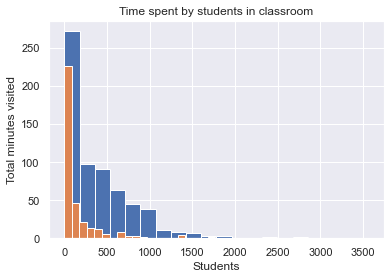

In [52]:
%matplotlib inline
plt.title('Time spent by students in classroom')
plt.xlabel("Students")
plt.ylabel("Total minutes visited")
plt.hist(passing_engagement_by_account_total_minutes_visited.values(), bins=20)
plt.hist(non_passing_engagement_by_account_total_minutes_visited.values(), bins=20)

(array([302.,  15.,  12.,   5.,   2.,   4.,   3.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  1.35,  2.7 ,  4.05,  5.4 ,  6.75,  8.1 ,  9.45, 10.8 ,
        12.15, 13.5 , 14.85, 16.2 , 17.55, 18.9 , 20.25, 21.6 , 22.95,
        24.3 , 25.65, 27.  ]),
 <BarContainer object of 20 artists>)

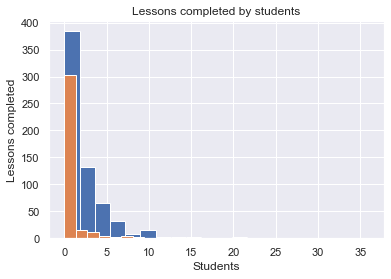

In [53]:
%matplotlib inline
plt.title('Lessons completed by students')
plt.xlabel("Students")
plt.ylabel("Lessons completed")
plt.hist(passing_engagement_by_account_lessons_completed.values(), bins=20)
plt.hist(non_passing_engagement_by_account_lessons_completed.values(), bins=20)

(array([97., 90., 56., 41., 15., 24., 17.,  8.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

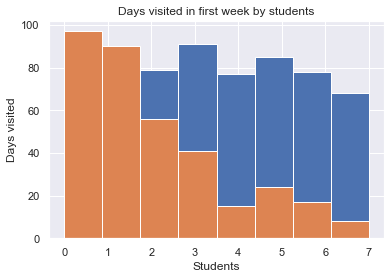

In [54]:
%matplotlib inline
plt.xlabel("Students")
plt.ylabel("Days visited")
plt.title('Days visited in first week by students')
plt.hist(passing_engagement_by_account_days_visited.values(), bins=8)
plt.hist(non_passing_engagement_by_account_days_visited.values(), bins=8)